# Введение

Используя эти команды, можно получить исходные данные

`!kaggle competitions download -c titanic`

`!unzip titanic.zip`


## Описание датастета

Для данной работы используется датасет [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic). В нем даны признаковые описания пассажиров, которые находились на борту судна. По данным признакам предлагается установить, выжил ли пассажир в катастрофе. Перефразируя: перед нами стоит задача классификации на два класса - выжившие/невыжившие. Приведем краткое описание данных:

<table>
    <tr>
        <th>Variable</th>
        <th>Definition</th>
        <th>Key</th>
    </tr>
    <tr>
        <td>survival</td>
        <td>Выжил ли пассажир</td>
        <td>0 = Нет, 1 = Да</td>
    </tr>
        <tr>
        <td>pclass</td>
        <td>Класс билета</td>
        <td>1 = первый, 2 = второй, 3 = третий</td>
    </tr>
        <tr>
        <td>sex</td>
        <td>Пол</td>
        <td></td>
    </tr>
        <tr>
        <td>Age</td>
        <td>Возраст в годах</td>
        <td></td>
    </tr>
        <tr>
        <td>sibsp</td>
        <td>Количество братьев и сестер / супругов на борту Титаника	</td>
        <td></td>
    </tr>
        <tr>
        <td>parch</td>
        <td>Количество родителей / детей на борту Титаника</td>
        <td></td>
    </tr>
        <tr>
        <td>ticket</td>
        <td>Номер билета</td>
        <td></td>
    </tr>
        <tr>
        <td>fare</td>
        <td>Стоимость билета</td>
        <td></td>
    </tr>
        <tr>
        <td>cabin</td>
        <td>Номер каюты</td>
        <td></td>
    </tr>
        <tr>
        <td>embarked</td>
        <td>Порт погрузки</td>
        <td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
</table>

__Цель лабораторной__: разобрать пример исследования и классификации данных с использованием некоторых библиотек на Python.

__Задачи__: 
- Выбрать интересующий (любой) набор данных (DataSet). Разнообразные наборы Dataset'ы можно скачать с [kaggle](https://www.kaggle.com/). DataSet обычно представляет собой файл с таблицей в формате JSON или CSV.
- Установить сам интерпретатор Python3 с библиотеками
- Провести анализ данных и сделать выводы

# 1 часть

Импорт необходимых библиотек

In [70]:
import numpy as np
import pandas as pd

from sklearn import model_selection, linear_model, metrics, pipeline, preprocessing, ensemble

import seaborn as sns
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Фиксация переменных для воспроизводимости результата

In [71]:
N_THREADS = 4
RANDOM_STATE = 17
TEST_SIZE = 0.2

## Загрузка и визуализация данных в виде таблицы

In [72]:
raw_data = pd.read_csv('train.csv')

In [73]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Гипотезы

1. __При кораблекрушении спаслось больше женщин, чем мужчин.__

Для проверки этой гипотезы можно построить гистограммы распределения выживших пассажиров по признаку Sex.

2. __Класс пассажира может коррелировать с выживаемостью.__ 

Возможно те, кто ехал в первом классе, имели возможность сесть в спасательные шлюпки раньше тех, кто ехал во втором и третьем. Для проверки этой гипотезы можно построить график распределения погибших и выживших по классам. Тогда мы не только сможем оценить количество ввыживших, но и долю выживших по каждому классу.

3. __Возраст пассажира может коррелировать с выживаемостью.__ 

Вероятно взрослые люди в рассвете сил имеют больше шансов выжить при катастрофе. Для проверки этой гипотезы можно построить графики, показывающие распределение возрастов выживших/невыживших пассажиров.

## Модель

Для того, чтобы спрогнозироввать выживет ли пассажир, будем использовать модель  `sklearn.linear_model.RidgeClassifier`. Попробуем обучить её сначала на тех признаках, которые были даны изначально, а затем введем дополнительные признаки и посмотрим, изменилась ли точность предсказаний.

# 2 и 3 часть 

## Первичная обработка данных

Посмотрим на типы данных, которые представлены в датасете

In [74]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Найдем количество пропусков

In [75]:
raw_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Для проверки первой и второй гипотез нам ничего не помешает. А перед проверкой третьей мы просто уберем строки с пропущенным значением возраста.

## Гипотеза 1

__Гипотеза__: При кораблекрушении спаслось больше женщин, чем мужчин.

<AxesSubplot:xlabel='Sex', ylabel='Count'>

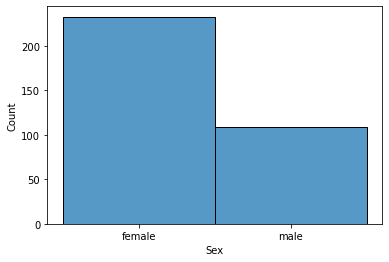

In [76]:
df = raw_data.copy()

sns.histplot(df[df['Survived'] == 1]['Sex'])

In [77]:
df[df['Survived'] == 1].groupby(["Sex"])["PassengerId"].count()

Sex
female    233
male      109
Name: PassengerId, dtype: int64

__Вывод:__ видим, что действительно, женщин спаслось гораздо больше (примерно в два раза). Возможно потому что в первую очередь при подобных катастрофах люди стараются спасать женщин и детей.

## Гипотеза 2 
__Гипотеза__: класс пассажира может коррелировать с выживаемостью.

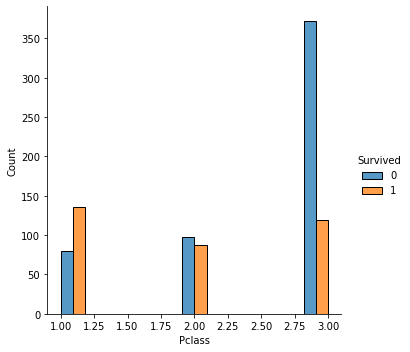

In [78]:
sns.displot(df, x='Pclass', hue='Survived', multiple="dodge")

__Вывод__: по гистограммам видно, что выживших 1 класса больше, чем выживших 3. Можно также заметить, что большинство погибших - это пассажиры третьего класса.

## Гипотеза 3
__Гипотеза__: Возраст пассажира может коррелировать с выживаемостью.

Чистка данных от людей, чей возраст не указан

In [79]:
df.dropna(subset=['Age'], inplace=True)

Гистограмма погибших

<AxesSubplot:xlabel='Age', ylabel='Count'>

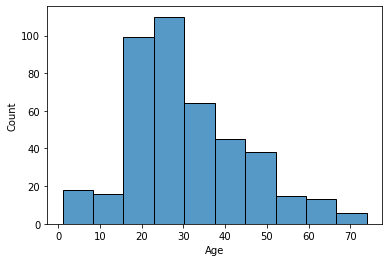

In [80]:
sns.histplot(df[df['Survived'] == 0]['Age'], bins=10)

Гистограмма выживших

<AxesSubplot:xlabel='Age', ylabel='Count'>

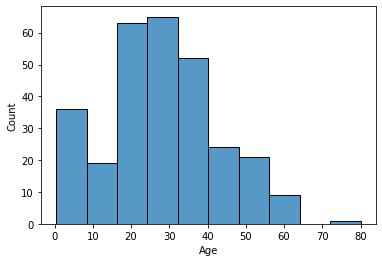

In [81]:
sns.histplot(df[df['Survived'] == 1]['Age'], bins=10)

__Вывод__:  по гистограмме выживших можно судить, что выживаемость была выше среди людей от 20 до 40 лет. Также видно, что выживаемость среди детей больше (так как люди стремятся спасать детей в первую очередь). Пик гистограммы погибших - люди, возраста около 40. Таким образом пик гистограммы выживших смещен по возрасту влево, относительно пика гистограммы погибших.

# Применение методов машинного обучения

## Предобработка данных

Заполним пропуски в возрасте и порту погрузки, ориентируюясь на медианные и наиболее распространненные значения.

In [82]:
df = raw_data.copy()
df['Age'].fillna(df["Age"].median(), inplace=True)

<AxesSubplot:>

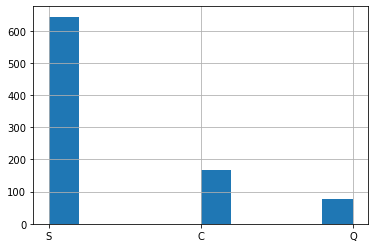

In [83]:
df['Embarked'].hist()

In [84]:
df["Embarked"].fillna("S", inplace=True)

Проверим, что в данных больше нет пропусков

In [85]:
df.isnull().values.any()

True

Возьмем лишь те столбцы, что пригодны для обработки классификатором. То есть нужно взять лишь те признаки, которые можно будет обработать как численные или категориальные.

Разобьем данные на train/test

In [86]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(df.drop(["Cabin", 'Ticket', 'PassengerId', 'Name', 'Survived'], axis = 1), df['Survived'].values, 
                                                                                     test_size = TEST_SIZE)

In [87]:
categorical_data_columns = ['Sex', 'Embarked'] 
categorical_data_indices = np.array([(column in categorical_data_columns) for column in train_data.columns], dtype = bool)

In [88]:
numeric_data_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
numeric_data_indices = np.array([(column in numeric_data_columns) for column in train_data.columns], dtype = bool)

## Pipeline

Построим пайплайн, которые автоматически будет обрабатывать признаки, а также обучать выбранную нами модель

In [89]:
classifier = linear_model.RidgeClassifier(random_state = RANDOM_STATE)

In [90]:
estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = [  
            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data.iloc[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler(with_mean = 0))            
                        ])),
            #categorical
            ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data.iloc[:, categorical_data_indices])),
                ('hot_encoding', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))            
                        ])),
        ])),
    ('model_fitting', classifier)
    ]
)

In [91]:
estimator.fit(train_data, train_labels)

Pipeline(steps=[('feature_processing',
                 FeatureUnion(transformer_list=[('numeric_variables_processing',
                                                 Pipeline(steps=[('selecting',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7fd35a545a60>)),
                                                                 ('scaling',
                                                                  StandardScaler(with_mean=0))])),
                                                ('categorical_variables_processing',
                                                 Pipeline(steps=[('selecting',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7fd35a545b80>)),
                                                                 ('hot_encoding',
                                                                  OneHotEncoder(handle_unknown='ignore'))]))])),
  

Необходимо проверить, не переобучилась ли наша модель, а также нет ли среди признаков сильно коррелирующих. Для этого достаточно проверить коэффициенты. Если среди них нет больших, то можно судить о том, что всё в порядке.

In [92]:
classifier.coef_

array([[-0.26903149, -0.12068101, -0.05986057, -0.04780673,  0.05532636,
         0.52149685, -0.52149685,  0.08672948,  0.01714663, -0.10387612]])

## Оценка по отложенному тесту

Проверим, насколько хорошо наша модель работает на тестовых данных. 

In [93]:
metrics.accuracy_score(test_labels, estimator.predict(test_data))

0.7486033519553073

# Улучшение модели

Для улучшения попробуем добавить дополнительные признаки.

In [94]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

def create_extra_features(data):
    data['Name_Words_Count'] = data['Name'].map(lambda x: len(x.split()))
    data['Has_Cabin'] = data["Cabin"].map(lambda x: 1 - int(type(x) == float))
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    
    data['CategoricalFare'] = pd.qcut(data['Fare'], 5).astype(str)
    data['CategoricalAge'] = pd.cut(data['Age'], 5).astype(str)
    
    data['Title'] = data['Name'].apply(get_title).replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    data['Title'] = data['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}).fillna(0)
    return data

In [95]:
df = create_extra_features(df)

In [96]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(df.drop(["Cabin", 'Ticket', 'PassengerId', 'Name', 'Survived'], axis = 1), df['Survived'].values, 
                                                                                     test_size = TEST_SIZE)

У нас появился новый тип признака: бинарный. А также добавилось несколько категориальных и числовых.

In [97]:
binary_data_columns = ['Has_Cabin']
binary_data_indices = np.array([(column in binary_data_columns) for column in train_data.columns], dtype = bool)

In [98]:
categorical_data_columns = ['Sex', 'Embarked', 'CategoricalFare', 'CategoricalAge'] 
categorical_data_indices = np.array([(column in categorical_data_columns) for column in train_data.columns], dtype = bool)

In [99]:
numeric_data_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Title', 'FamilySize', 'Name_Words_Count']
numeric_data_indices = np.array([(column in numeric_data_columns) for column in train_data.columns], dtype = bool)

Построим новый pipline, обучим модель, и посмотрим, улучшили ли мы модель.

In [100]:
classifier_new = linear_model.RidgeClassifier(random_state = RANDOM_STATE)

In [101]:
estimator_new = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = [
            #binary
            ('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data.iloc[:, binary_data_indices])), 
                    
            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data.iloc[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler(with_mean = 0))            
                        ])),
            #categorical
            ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data.iloc[:, categorical_data_indices])),
                ('hot_encoding', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))            
                        ])),
        ])),
    ('model_fitting', classifier_new)
    ]
)

In [102]:
estimator_new.fit(train_data, train_labels)

Pipeline(steps=[('feature_processing',
                 FeatureUnion(transformer_list=[('binary_variables_processing',
                                                 FunctionTransformer(func=<function <lambda> at 0x7fd35a531b80>)),
                                                ('numeric_variables_processing',
                                                 Pipeline(steps=[('selecting',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7fd35a531280>)),
                                                                 ('scaling',
                                                                  StandardScaler(with_mean=0))])),
                                                ('categorical_variables_processing',
                                                 Pipeline(steps=[('selecting',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7fd35a531040>)),
  

In [103]:
metrics.accuracy_score(test_labels, estimator_new.predict(test_data))

0.776536312849162

In [104]:
classifier_new.coef_

array([[ 0.26055101, -0.14983505, -0.11837549, -0.08552123, -0.04240112,
         0.02522332,  0.03930955, -0.07943128,  0.13849408,  0.44043211,
        -0.44043211,  0.0973088 ,  0.01827195, -0.11558075, -0.0464211 ,
         0.04243366,  0.00375433, -0.00721057,  0.00744369,  0.15816391,
        -0.05798496,  0.02453864, -0.05772403, -0.06699356]])

__Вывод__: можно сделать вывод о том, что добавление дополнительных признаков положительно сказалось на точности предсказаний нашей модели.